#어떤 데이터로부터 그래프의 형태를 추론하는 과정 중 
 - 적정학습
 - 과적학습(over) : 너무 지나치게 오차를 줄이려다보니 그래프의 형태가 이상해짐
 - 과소학습(under) : 아직 데이터값이 부족하여 그래프의 형태가 정확하지않음

 = 과소,과적을 피하기위해 모니터링이 필요함 $항상!$


#데이터의 종류
 - Train-dataset : 학습할 때 실제로 사용할 데이터
 - Vaildation-dataset : 학습과정 모니터용 데이터
 - Test-dataset : 실제 운용할 데이터(학습과정 중 발생하는 데이터 값은 아님)

#학습 정도에 따른 진단
 1. 적정적합 : Train-dataset의 Loss, Vaildation-dataset의 Loss 모두 적절히 충분히 낮음
 2. 과적적합 : Train-dataset의 Loss는 매우 작고, Vaildation-dataset의 Loss는 크다
 3. 과소적합 : Train-dataset의 Loss, Vaildation-dataset의 Loss 모두 큰 상태

#Data bantching
전체 데이터에서 용도에 따라 Traing, Vaild, Test용을 대략 8:1:1정도로 나눈다.
하지만 실제 데이터에선 용도에 따라 구분되어있지 않으므로 일반적인 수치인 8:1:1로 나눠주면 편하다. 데이터 값은 최소 수천개 이상은 되어야 함

- 데이터 분류 프로세스
 - Data-shffling : 전체 데이터를 골고루 섞음
 - Dataser-sepertion : Train, Vaild, Test 용도별 분리
 - Data preprocess : 전처리(잡음제거, 정규화(단위맞추기), 등등...)


 - data batching
 (........................................) => 
 (....)(....)(....)(....)(....)(....)(....)(....)(....)(....)
  - 학습단계 : Batch(X,Y) Stochastic Gradient Descent 를 하기에는 데이터의 양이 너무 많으므로 batch를 통해 부담이 덜 가게 함
  - 데이터 배치
  1. Full batch : 전체 데이터셋을 하나의 Batch로 봄
  2. Mini Batch : 적정 사이즈(m)의 Batch로 묶음 -> $X \in R^{m*d1}, Y \in R^{m*d2}$
 Batch단위로 Training -> SGD, 모든 Batch 학습 후 다시 학습(1회의 단위) -> 1epoch 

- PyTorch를 이용한 데이터 가공 예시

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

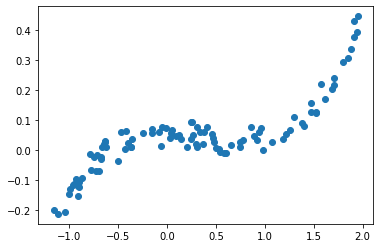

In [ ]:
# 우리가 맞출 데이터
x = np.random.uniform(-1.2,2,size=(100))
y = 0.1*x**3-0.1*x**2+0.1*np.random.uniform(size=(100))
plt.plot(x,y,'o')

In [ ]:
#train_vaildataion_test 분류
data = np.concatenate((x.reshape(-1,1),y.reshape (-1,1)),axis=-1) # X(input),Y(target)를 묶음
print(data.shape) # 차원0: 데이터개수, 차원1: (x,y) --> (100,2) size
np.random.shuffle(data) #데이터를 골고루(임의로) 섞음

test_num = int(data.shape[0]*0.1) #data.shape[0] = 100
vaild_num = int(data.shape[0]*0.1)
train_num = data.shape[0]-test_num-vaild_num

train_data = data[:train_num] # 0~79개 : (80,2)
vaild_data = data[train_num:train_num+vaild_num] # 80~89 : (10,2)
test_data = data[train_num+vaild_num:] # 90~99 : (10,2)

(100, 2)


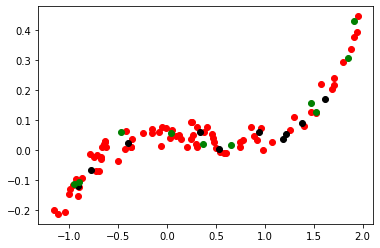

In [ ]:
plt.plot(train_data[:,0],train_data[:,1],'ro')
plt.plot(vaild_data[:,0],vaild_data[:,1],'ko')
plt.plot(test_data[:,0],test_data[:,1],'go')

In [ ]:
# torch batch 
class dataset(torch.utils.data.Dataset): # 아무이름이나 해도 됨
  def __init__(self,data):
    self.data = data
    self.x = self.data[:,0].reshape(-1,1)
    self.y = self.data[:,1].reshape(-1,1)

  def __getitem__(self,idx):  
    # (100,2) --> batchsiz = 3 --> idx(0,36,85) : 임의로 세 숫자를 뽑아서 그 순서에 해당하는 데이터를 이용함
    return torch.Tensor(self.x[idx]),torch.Tensor(np.array(self.y[idx]))

  def __len__(self):
    return len(self.data)

In [ ]:
train_dataset = dataset(train_data) #(80,2)
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=32,shuffle=True,drop_last=False)
#80=32+32+16이므로 뒤에 16부분을 버리지않고 가져감 == drop_last=False

In [ ]:
cnt = 0
for X,Y in train_loader:
  print(X.shape)
  print(Y.shape)
  cnt += 1
  if cnt == 3:
    break

torch.Size([32, 1])
torch.Size([32, 1])
torch.Size([32, 1])
torch.Size([32, 1])
torch.Size([16, 1])
torch.Size([16, 1])
